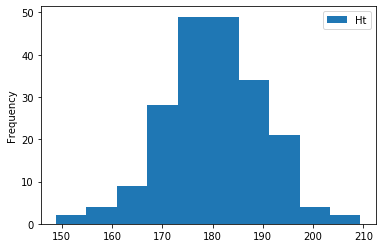

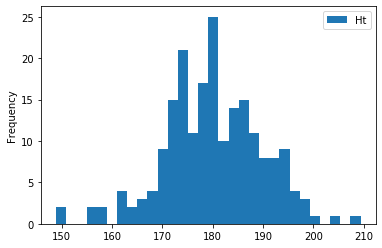

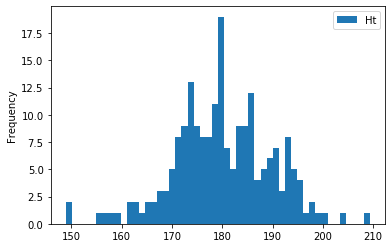

In [1]:
import numpy as np
################################
# ヒストグラムと正規分布
import pandas as pd
import matplotlib.pyplot as plt
data_dir = './data/'

# csvを読み込み
HW_data=pd.read_csv(data_dir+"/height_weight.csv")
# ヒストグラムをプロット
HW_data.plot(kind="hist",y='Ht') # (HW_data.plot(kind="hist",y=2)) でもOK.
plt.show()

# bin数を30に設定
HW_data.plot(kind="hist",y='Ht',bins=30)
plt.show()

# bin数を50に設定
HW_data.plot(kind="hist",y='Ht',bins=50)
plt.show()




180.1039603960396
94.2912714439761
9.710369274336383


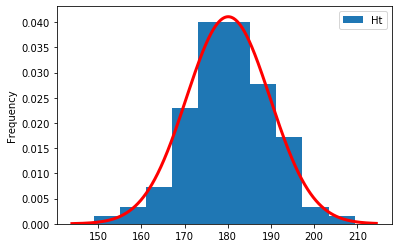

In [2]:
# 正規分布で表現
# 正規分布のパラメータ（平均、分散）を求める
Ht_mu = np.mean(HW_data['Ht']) # 平均
Ht_var = np.var(HW_data['Ht']) # 分散：標準偏差の二乗
Ht_std = np.std(HW_data['Ht']) # 標準偏差
print(Ht_mu)
print(Ht_var)
print(Ht_std)

# 正規分布とヒストグラムを可視化
from scipy.stats import norm
HW_data.plot(kind="hist",y='Ht', density=True) # ヒストグラムをプロット
a = np.min(HW_data['Ht'])-5 # xの下限
b = np.max(HW_data['Ht'])+5 # xの上限
x = np.arange(a,b,0.01) # xを0.01刻みで生成
y = norm.pdf(x,loc=Ht_mu,scale=Ht_std) # 正規分布の確率を求める
plt.plot(x,y,lw=3,color="r") # 正規分布を線でプロット
plt.show()

0.000906628095277654
0.1179317704803018


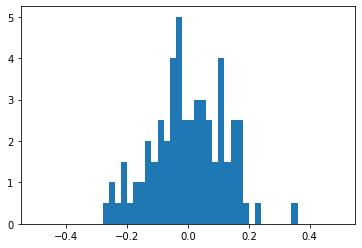

In [3]:
################################
# 標本平均の分布

# ランダムサンプリングと標本平均
import random
N = 100 # 1回の標本中のサンプリング数
K = 100 # 標本回数
mu = 0 # 平均
sigma = 1 # 標準偏差（分散の平方根）
meanList = [] # 標本平均を保存するリストを初期化
for j in range(K): # 標本取得をK回繰り返す
    samples = [] # サンプルのリスト
    for i in range(N): # N個の標本をサンプリング
        a = random.gauss(mu,sigma)# 正規分布に従ったランダムサンプリング
        samples.append(a)
    sample_mean = np.mean(samples) # 標本平均の計算
    meanList.append(sample_mean) # 標本平均をリストに保存
    
# ヒストグラムで標本平均の分布を正規化して表示
plt.hist(meanList,range=[-0.5,0.5], bins=50, density=True)
mu = np.mean(meanList) # 平均
std = np.std(meanList) # 標準偏差
print(mu)
print(std)

In [4]:
################################
# 母平均の推定
from scipy import stats
# data読み込み
Grade_data=pd.read_csv(data_dir+"grade_data1.csv",sep=",")
# 平均と標準偏差を求める
mu = np.mean(Grade_data['English'])
sigma = np.std(Grade_data['English'])
print(mu)
print(sigma)
# 母平均の95%信頼区間の推定
alpha = 0.95 # 信頼係数95%
n = len(Grade_data['English']) # sample数
t = stats.t.ppf(1-(1-alpha)/2, n-1) # t分布を用いて確率変数tを計算
t_min = mu - t * sigma / np.sqrt(n-1) # 下限
t_max = mu + t * sigma / np.sqrt(n-1) # 上限
print(u"信頼区間の下限:",t_min)
print(u"信頼区間の上限:",t_max)


68.5
17.783419243778738
信頼区間の下限: 55.09037025988665
信頼区間の上限: 81.90962974011336


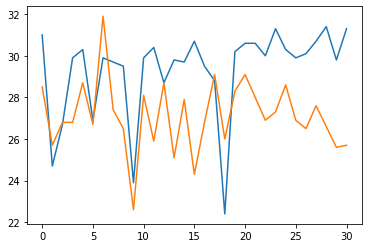

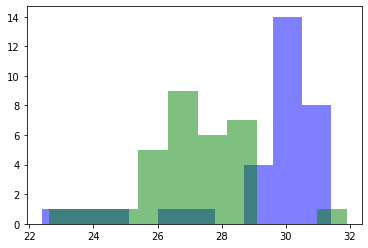

29.30967741935483
4.553132154006245


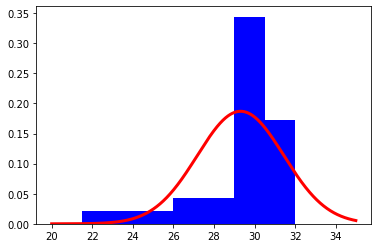

In [5]:
################################

# 福岡と東京に気温差はあるか？

import pandas as pd
# 日付がついておらず、対応は取れないデータ
temper_FT=pd.read_csv(data_dir + '/temperature_FT_August.csv')

# 可視化 : plot
plt.plot(temper_FT['Fukuoka'])
plt.plot(temper_FT['Tokyo'])
plt.show()

# 可視化 : histgram
plt.hist(temper_FT['Fukuoka'], color='blue', alpha=0.5)
plt.hist(temper_FT['Tokyo'], color='green', alpha=0.5)
plt.show()

# 福岡：histogram へガウス分布を当てはめる
from scipy.stats import norm
F_mean = np.mean(temper_FT['Fukuoka']) # 平均
F_var = np.var(temper_FT['Fukuoka']) # 分散
print(F_mean)
print(F_var)

# ヒストグラムをプロット
plt.hist(temper_FT['Fukuoka'], color='blue', range=(20,35), density=True)
# 正規分布を線でプロット
x = np.arange(20,35,0.01) # xの値を20～35で0.01刻みで生成
plt.plot(x,norm.pdf(x,loc=F_mean,scale=np.sqrt(F_var)),lw=3,color="r")



27.116129032258065
2.8071592091571267


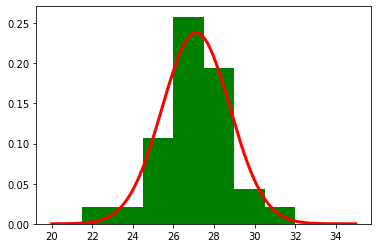

In [6]:

# 東京：histogram へガウス分布を当てはめる
T_mean = np.mean(temper_FT['Tokyo'])
T_var = np.var(temper_FT['Tokyo'])
print(T_mean)
print(T_var)

# ヒストグラムをプロット
plt.hist(temper_FT['Tokyo'], color='green', 
         range=(20,35), density=True)
# 正規分布を線でプロット
x = np.arange(20,35,0.01) # xの値を20～35で0.01刻みで生成
plt.plot(x,norm.pdf(x,loc=T_mean,scale=np.sqrt(T_var)),
         lw=3,color="r")


In [7]:
# 対応なしt検定
from scipy import stats
t, p = stats.ttest_ind(temper_FT['Fukuoka'], 
                       temper_FT['Tokyo'], 
                       equal_var=False)
print(t)
print(p)

4.42853766713343
4.370711613741879e-05


In [8]:
# 対応あり t検定
import pandas as pd
temper_FT=pd.read_csv(data_dir + 'temperature_FT_August_pairs.csv') # 日付で対応が取れている
t, p = stats.ttest_rel(temper_FT['Fukuoka'], temper_FT['Tokyo'])
print(t)
print(p)

5.977020238021845
1.4868011795091875e-06


11.890806873380345
2.61618782053936e-05


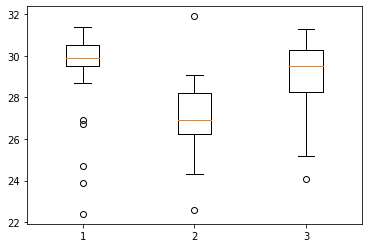

In [9]:
# 分散分析
# 東京のデータだけランダムに並び替え
#random_temper_tokyo = np.random.permutation(temper_FT['Tokyo'])

# データ読み込み
temper_FTK_August=pd.read_csv(data_dir + '/temperature_FTK_August.csv')

# 3群のデータをグラフでみる
plt.boxplot([temper_FTK_August['Fukuoka'],
             temper_FTK_August['Tokyo'],
             temper_FTK_August['Kyoto']])

# 3群の検定（分散分析）
f, p = stats.f_oneway(temper_FTK_August['Fukuoka'], 
                      temper_FTK_August['Tokyo'],
                      temper_FTK_August['Kyoto'])
print(f)
print(p)


In [10]:
# 多重比較
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

def TukeyKramer(*args): #可変長引数で比較するリストを受け取る
    idx = 0
    data_arr = np.array([]) #全てのデータを一次元配列で列記する
    idx_arr = np.array([]) #データに対応するインデックスを一次元配列で列記する
    # (今回であればFukuokaは0, Tokyoは1, Kyotoは2になる)
    
    for lst in args: # argsは複数の引数が格納されたlistであり、for文でargsの要素(lst)を1つずつ処理していく
        for nums in lst: # lstは数字(温度)が格納されたlistであり、for文でlstの要素(nums)を1つずつ処理していく
            if isinstance(nums, str) == False: # numsが文字列(欠損値など)であればskip
                
                # 温度の値を一次元配列に列記していく
                data_arr = np.append(data_arr, nums)
                # データに対応するインデックスを一次元配列に列記していく
                idx_arr = np.append(idx_arr, idx)
        
        # 1種類のデータ(Fukuoka等)を全て列記し終えたらインデックスを+1
        idx += 1
        
    # Tukey-Kramer検定
    print(pairwise_tukeyhsd(data_arr, idx_arr)) #第3引数のdefaultはp=0.05

# Fukuoka, Tokyo, Kyotoの温度を多重比較
TukeyKramer(temper_FTK_August['Fukuoka'], 
            temper_FTK_August['Tokyo'],
            temper_FTK_August['Kyoto'])     


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0  -2.1935  0.001 -3.3511 -1.036   True
   0.0    2.0  -0.3226 0.7647 -1.4802  0.835  False
   1.0    2.0    1.871  0.001  0.7134 3.0286   True
---------------------------------------------------


In [11]:
# カイ2乗分布
from pandas import DataFrame,Series
from scipy.stats import chisquare
# 肺癌調査結果
#　　　　　　　　　　正常，肺癌
#'smoking'    :60,40
#'non-smoking':120,30
numb  = Series([60,120,40,30],name ="観測度数")
theo = Series([100/250*180, 150/250*180, 100/250*70, 150/250*70],name="期待度数")
x, p = chisquare(numb,theo)
print(x)
print(p)

11.904761904761905
0.007716629386744526
